# Visualizzazione scientifica con Magic the Gathering

Importo le librerie e definisco una variabile per il file contenente i dati. Il file può essere trovato al link https://scryfall.com/docs/api/bulk-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mtg_file = 'data/default-cards-20230528090642.json'

Importo il dataset

In [2]:
%%time
df = pd.read_json(mtg_file)

CPU times: user 10.9 s, sys: 1.82 s, total: 12.7 s
Wall time: 13.7 s


In [3]:
df.head()

,object,id,oracle_id,multiverse_ids,mtgo_id,mtgo_foil_id,tcgplayer_id,cardmarket_id,name,lang,...,tcgplayer_etched_id,attraction_lights,color_indicator,variation_of,life_modifier,hand_modifier,printed_type_line,printed_text,content_warning,flavor_name
0,card,0000579f-7b35-4ed3-b44c-db2a538066fe,44623693-51d6-49ad-8cd7-140505caf02f,[109722],25527.0,25528.0,14240.0,13850.0,Fury Sliver,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,card,00006596-1166-4a79-8443-ca9f82e6db4e,8ae3562f-28b7-4462-96ed-be0cf7052ccc,[189637],34586.0,34587.0,33347.0,21851.0,Kor Outfitter,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,card,0000a54c-a511-4925-92dc-01b937f9afad,dc4e2134-f0c2-49aa-9ea3-ebf83af1445c,[],NaN,NaN,98659.0,NaN,Spirit,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,card,0000cd57-91fe-411f-b798-646e965eec37,9f0d82ae-38bf-45d8-8cda-982b6ead1d72,[435231],65170.0,65171.0,145764.0,301766.0,Siren Lookout,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,card,00012bd8-ed68-4978-a22d-f450c8a6e048,5aa12aff-db3c-4be5-822b-3afdf536b33e,[1278],NaN,NaN,1623.0,5664.0,Web,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pulizia dataset e raccolta di dati utili

Stampo un elenco degli attributi di ogni carta

In [4]:
colonne = list(df.columns.values)
colonne

['object',
 'id',
 'oracle_id',
 'multiverse_ids',
 'mtgo_id',
 'mtgo_foil_id',
 'tcgplayer_id',
 'cardmarket_id',
 'name',
 'lang',
 'released_at',
 'uri',
 'scryfall_uri',
 'layout',
 'highres_image',
 'image_status',
 'image_uris',
 'mana_cost',
 'cmc',
 'type_line',
 'oracle_text',
 'power',
 'toughness',
 'colors',
 'color_identity',
 'keywords',
 'legalities',
 'games',
 'reserved',
 'foil',
 'nonfoil',
 'finishes',
 'oversized',
 'promo',
 'reprint',
 'variation',
 'set_id',
 'set',
 'set_name',
 'set_type',
 'set_uri',
 'set_search_uri',
 'scryfall_set_uri',
 'rulings_uri',
 'prints_search_uri',
 'collector_number',
 'digital',
 'rarity',
 'flavor_text',
 'card_back_id',
 'artist',
 'artist_ids',
 'illustration_id',
 'border_color',
 'frame',
 'full_art',
 'textless',
 'booster',
 'story_spotlight',
 'edhrec_rank',
 'penny_rank',
 'prices',
 'related_uris',
 'all_parts',
 'promo_types',
 'arena_id',
 'preview',
 'security_stamp',
 'produced_mana',
 'watermark',
 'frame_effects'

Come si può notare, ogni oggetto carta presenta un grande numero di attributi. Può essere utile mantenere solo i più rilevanti al fine di ottenere un dataset più leggero e facilmente consultabile.

In [5]:
da_considerare = ['name', 'lang', 'layout', 'type_line', 'arena_id', 'mtgo_id', 'cmc', 'color_identity', 'colors', 'edhrec_rank', 'mana_cost', 'power', 'toughness', 'prices', 'rarity', 'set_name']

In [6]:
df = df[da_considerare]

Aggiungo una colonna per il numero di colori di ogni carta

In [7]:
def count_colors(row):
    return len(row['color_identity'])

df['num_colors'] = df.apply(count_colors, axis=1)

In [8]:
df.head()

,name,lang,layout,type_line,arena_id,mtgo_id,cmc,color_identity,colors,edhrec_rank,mana_cost,power,toughness,prices,rarity,set_name,num_colors
0,Fury Sliver,en,normal,Creature — Sliver,NaN,25527.0,6.0,[R],[R],6118.0,{5}{R},3,3,"{'usd': '0.40', 'usd_foil': '4.24', 'usd_etche...",uncommon,Time Spiral,1
1,Kor Outfitter,en,normal,Creature — Kor Soldier,NaN,34586.0,2.0,[W],[W],15159.0,{W}{W},2,2,"{'usd': '0.27', 'usd_foil': '7.42', 'usd_etche...",common,Zendikar,1
2,Spirit,en,token,Token Creature — Spirit,NaN,NaN,0.0,[W],[W],NaN,,1,1,"{'usd': '0.10', 'usd_foil': None, 'usd_etched'...",common,Modern Masters 2015 Tokens,1
3,Siren Lookout,en,normal,Creature — Siren Pirate,66119.0,65170.0,3.0,[U],[U],13503.0,{2}{U},1,2,"{'usd': '0.04', 'usd_foil': '0.19', 'usd_etche...",common,Ixalan,1
4,Web,en,normal,Enchantment — Aura,NaN,NaN,1.0,[G],[G],20508.0,{G},NaN,NaN,"{'usd': '0.63', 'usd_foil': None, 'usd_etched'...",rare,Revised Edition,1


# Raccolta dati utili

### Carte senza duplicati

Molte carte sono state ristampate in vari set. Per ottenere alcuni tipi di dati è utile avere un dataset in cui ogni carta compare una sola volta. Creo quindi un dataset che rispetti questa caratteristica.

In [9]:
uniqueCards = df.drop_duplicates(subset=['name'])

In [10]:
uniqueCards.shape

(28394, 17)

In [11]:
df.shape

(83121, 17)

Come si può notare la dimensione del nuovo dataset è molto minore rispetto a quello di partenza

### Layout

Esistono diversi layout di carte:

In [12]:
uniqueCards['layout'].value_counts()

layout
normal                25804
art_series             1066
token                   372
transform               312
planar                  112
vanguard                107
split                    92
emblem                   76
modal_dfc                70
scheme                   70
adventure                65
saga                     65
double_faced_token       61
leveler                  25
flip                     21
host                     20
meld                     18
class                    14
augment                  13
reversible_card          11
Name: count, dtype: int64

Le più rilevanti da analizzare sono le carte con layout normal. È quindi opportuno isolarle dalle altre.

In [13]:
normalCards = uniqueCards.drop(uniqueCards[uniqueCards.layout != 'normal'].index)
normalCards.shape

(25804, 17)

### Divisione carte per tipo

Ogni carta può essere di un tipo diverso:

In [14]:
normalCards['type_line'].value_counts()

type_line
Instant                                 2929
Sorcery                                 2754
Enchantment                             1528
Artifact                                1199
Enchantment — Aura                      1049
                                        ... 
Creature — Shapeshifter Wall               1
Creature — Rat Horror                      1
Legendary Creature — Halfling Horror       1
Artifact Creature — Egg                    1
Creature — Soldier                         1
Name: count, Length: 2637, dtype: int64

Come si può notare, ogni carta ha un tipo e un sottotipo. Per come è gestito il dataset, risulta una voce per ogni possibile combinazione di questi due attributi. È opportuno considerare ogni carta senza il suo sottotipo.

In [15]:
def splitString(type_line):
    splitted = type_line.split("—")
    new = splitted[0].strip()
    return new

normalCards['type_line'] = normalCards['type_line'].apply(splitString)

In [16]:
pd.set_option('display.max_rows', None)

In [17]:
normalCards['type_line'].value_counts()

type_line
Creature                          11065
Instant                            3015
Sorcery                            2802
Enchantment                        2627
Legendary Creature                 1746
Artifact                           1739
Artifact Creature                   893
Land                                738
Legendary Planeswalker              285
Enchantment Creature                129
Card                                115
Legendary Artifact                  111
Legendary Enchantment                59
Legendary Land                       54
Snow Creature                        53
Stickers                             48
Legendary Enchantment Creature       42
Legendary Artifact Creature          37
World Enchantment                    28
Conspiracy                           25
Tribal Instant                       21
Snow Land                            20
Artifact Land                        18
Hero                                 16
Tribal Sorcery                

A questo punto è opportuno dividere i tipi in macro categorie e creare un dataset ridotto per ogni categoria per facilitare la raccolta di altri dati.

In [18]:
colonne = ['name', 'lang', 'layout', 'type_line', 'arena_id', 'mtgo_id', 'cmc', 'color_identity', 'colors', 'edhrec_rank', 'mana_cost', 'power', 'toughness', 'prices', 'rarity', 'set_name', 'num_colors']

In [19]:
creatureCards = pd.DataFrame(columns=colonne)
sorceryCards = pd.DataFrame(columns=colonne)
instantCards = pd.DataFrame(columns=colonne)
enchantmentCards = pd.DataFrame(columns=colonne)
planeswalkerCards = pd.DataFrame(columns=colonne)
artifactCards = pd.DataFrame(columns=colonne)
landCards = pd.DataFrame(columns=colonne)
otherCards = pd.DataFrame(columns=colonne)

In [20]:
%%time
for index, row in normalCards.iterrows():
    if 'creature' in row['type_line'].lower():
        creatureCards.loc[len(creatureCards)] = row
        continue
    elif 'land' in row['type_line'].lower():
        landCards.loc[len(landCards)] = row
        continue
    elif 'sorcery' in row['type_line'].lower():
        sorceryCards.loc[len(sorceryCards)] = row
        continue
    elif 'instant' in row['type_line'].lower():
        instantCards.loc[len(instantCards)] = row
        continue
    elif 'enchantment' in row['type_line'].lower():
        enchantmentCards.loc[len(enchantmentCards)] = row
        continue
    elif 'planeswalker' in row['type_line'].lower():
        planeswalkerCards.loc[len(planeswalkerCards)] = row
        continue
    elif 'artifact' in row['type_line'].lower():
        artifactCards.loc[len(artifactCards)] = row
        continue
    else:
        otherCards.loc[len(otherCards)] = row

CPU times: user 3min 12s, sys: 3.94 s, total: 3min 16s
Wall time: 3min 17s


### Numero di carte per ogni colore

In [21]:
uniqueCards['color_identity'].value_counts()

color_identity
[]                 4222
[B]                4055
[W]                4005
[R]                3981
[U]                3954
[G]                3916
[U, W]              393
[B, U]              387
[B, R]              386
[G, W]              380
[G, R]              375
[R, W]              323
[B, W]              322
[B, G]              322
[R, U]              311
[G, U]              301
[B, G, R, U, W]     104
[B, R, U]            91
[G, R, W]            87
[B, G, R]            84
[B, U, W]            83
[G, U, W]            77
[B, R, W]            49
[R, U, W]            48
[B, G, U]            45
[G, R, U]            40
[B, G, W]            39
[B, G, U, W]          4
[G, R, U, W]          4
[B, R, U, W]          2
[B, G, R, U]          2
[B, G, R, W]          2
Name: count, dtype: int64

Come si può notare, esistono numerose combinazioni di colore per le carte. Per convenienza le carte che presentano più di un colore saranno considerate semplicemente come carte **multicolore**

#### Tutte le carte

In [22]:
colorIdentity = {'B': 'Black', 'G': 'Green', 'R': 'Red', 'U': 'Blue', 'W': 'White'}
colorCount = {'Black': 0, 'Green': 0, 'Red': 0, 'Blue': 0, 'White': 0, 'Colorless':0, 'Multi':0}

for raw in uniqueCards['color_identity']:
    if len(raw) == 0:
        colorCount['Colorless']+=1
    elif len(raw) > 1:
        colorCount['Multi']+=1
    else:
        for color in colorIdentity:
            if raw[0] == color:
                colorCount[colorIdentity[color]]+=1

In [23]:
colorCount

{'Black': 4055,
 'Green': 3916,
 'Red': 3981,
 'Blue': 3954,
 'White': 4005,
 'Colorless': 4222,
 'Multi': 4261}

#### Creature

In [24]:
creatureColorCount = {'Black': 0, 'Green': 0, 'Red': 0, 'Blue': 0, 'White': 0, 'Colorless':0, 'Multi':0}

for raw in creatureCards['color_identity']:
    if len(raw) == 0:
        creatureColorCount['Colorless']+=1
    elif len(raw) > 1:
        creatureColorCount['Multi']+=1
    else:
        for color in colorIdentity:
            if raw[0] == color:
                creatureColorCount[colorIdentity[color]]+=1

In [25]:
creatureColorCount

{'Black': 2220,
 'Green': 2285,
 'Red': 2133,
 'Blue': 1977,
 'White': 2216,
 'Colorless': 637,
 'Multi': 2511}

#### Sorcery

In [26]:
sorceryColorCount = {'Black': 0, 'Green': 0, 'Red': 0, 'Blue': 0, 'White': 0, 'Colorless':0, 'Multi':0}

for raw in sorceryCards['color_identity']:
    if len(raw) == 0:
        sorceryColorCount['Colorless']+=1
    elif len(raw) > 1:
        sorceryColorCount['Multi']+=1
    else:
        for color in colorIdentity:
            if raw[0] == color:
                sorceryColorCount[colorIdentity[color]]+=1

In [27]:
sorceryColorCount

{'Black': 692,
 'Green': 470,
 'Red': 609,
 'Blue': 424,
 'White': 312,
 'Colorless': 28,
 'Multi': 294}

#### Instant

In [28]:
instantColorCount = {'Black': 0, 'Green': 0, 'Red': 0, 'Blue': 0, 'White': 0, 'Colorless':0, 'Multi':0}

for raw in instantCards['color_identity']:
    if len(raw) == 0:
        instantColorCount['Colorless']+=1
    elif len(raw) > 1:
        instantColorCount['Multi']+=1
    else:
        for color in colorIdentity:
            if raw[0] == color:
                instantColorCount[colorIdentity[color]]+=1

In [29]:
instantColorCount

{'Black': 430,
 'Green': 432,
 'Red': 531,
 'Blue': 736,
 'White': 572,
 'Colorless': 6,
 'Multi': 333}

#### Enchantment

In [30]:
enchantmentColorCount = {'Black': 0, 'Green': 0, 'Red': 0, 'Blue': 0, 'White': 0, 'Colorless':0, 'Multi':0}

for raw in enchantmentCards['color_identity']:
    if len(raw) == 0:
        enchantmentColorCount['Colorless']+=1
    elif len(raw) > 1:
        enchantmentColorCount['Multi']+=1
    else:
        for color in colorIdentity:
            if raw[0] == color:
                enchantmentColorCount[colorIdentity[color]]+=1

In [31]:
enchantmentColorCount

{'Black': 452,
 'Green': 452,
 'Red': 419,
 'Blue': 555,
 'White': 619,
 'Colorless': 3,
 'Multi': 242}

#### Planeswalker

In [32]:
planeswalkerColorCount = {'Black': 0, 'Green': 0, 'Red': 0, 'Blue': 0, 'White': 0, 'Colorless':0, 'Multi':0}

for raw in planeswalkerCards['color_identity']:
    if len(raw) == 0:
        planeswalkerColorCount['Colorless']+=1
    elif len(raw) > 1:
        planeswalkerColorCount['Multi']+=1
    else:
        for color in colorIdentity:
            if raw[0] == color:
                planeswalkerColorCount[colorIdentity[color]]+=1

In [33]:
planeswalkerColorCount

{'Black': 25,
 'Green': 30,
 'Red': 38,
 'Blue': 30,
 'White': 31,
 'Colorless': 6,
 'Multi': 126}

#### Artifact

In [34]:
artifactColorCount = {'Black': 0, 'Green': 0, 'Red': 0, 'Blue': 0, 'White': 0, 'Colorless':0, 'Multi':0}

for raw in artifactCards['color_identity']:
    if len(raw) == 0:
        artifactColorCount['Colorless']+=1
    elif len(raw) > 1:
        artifactColorCount['Multi']+=1
    else:
        for color in colorIdentity:
            if raw[0] == color:
                artifactColorCount[colorIdentity[color]]+=1

In [35]:
artifactColorCount

{'Black': 56,
 'Green': 54,
 'Red': 66,
 'Blue': 61,
 'White': 80,
 'Colorless': 1415,
 'Multi': 133}

#### Land

In [36]:
landColorCount = {'Black': 0, 'Green': 0, 'Red': 0, 'Blue': 0, 'White': 0, 'Colorless':0, 'Multi':0}

for raw in landCards['color_identity']:
    if len(raw) == 0:
        landColorCount['Colorless']+=1
    elif len(raw) > 1:
        landColorCount['Multi']+=1
    else:
        for color in colorIdentity:
            if raw[0] == color:
                landColorCount[colorIdentity[color]]+=1

In [37]:
landColorCount

{'Black': 43,
 'Green': 40,
 'Red': 42,
 'Blue': 41,
 'White': 42,
 'Colorless': 286,
 'Multi': 350}

#### Other cards

In [38]:
otherColorCount = {'Black': 0, 'Green': 0, 'Red': 0, 'Blue': 0, 'White': 0, 'Colorless':0, 'Multi':0}

for raw in otherCards['color_identity']:
    if len(raw) == 0:
        otherColorCount['Colorless']+=1
    elif len(raw) > 1:
        otherColorCount['Multi']+=1
    else:
        for color in colorIdentity:
            if raw[0] == color:
                otherColorCount[colorIdentity[color]]+=1

In [39]:
otherColorCount

{'Black': 2,
 'Green': 4,
 'Red': 4,
 'Blue': 1,
 'White': 4,
 'Colorless': 202,
 'Multi': 2}

In [40]:
colorByType = {
    'creature': creatureColorCount,
    'instant': instantColorCount,
    'sorcery': sorceryColorCount,
    'enchantment': enchantmentColorCount,
    'planeswalker': planeswalkerColorCount,
    'artifact': artifactColorCount,
    'other': otherColorCount
}

### MTG Online e MTG Arena

Può essere interessante sapere quante delle carte esistenti sono presenti anche su i giochi MTG Online e MTG Arena, sia considerando tutte le carte che considerandole per tipo.

In [41]:
mtgoCountAll = uniqueCards.count()['mtgo_id']
mtgoCountNormal = normalCards.count()['mtgo_id']
mtgoCountCreature = creatureCards.count()['mtgo_id']
mtgoCountSorcery = sorceryCards.count()['mtgo_id']
mtgoCountInstant = instantCards.count()['mtgo_id']
mtgoCountEnchantment = enchantmentCards.count()['mtgo_id']
mtgoCountArtifact = artifactCards.count()['mtgo_id']
mtgoCountLand = landCards.count()['mtgo_id']
mtgoCountOther = otherCards.count()['mtgo_id']

In [42]:
mtgaCountAll = uniqueCards.count()['arena_id']
mtgaCountNormal = normalCards.count()['arena_id']
mtgaCountCreature = creatureCards.count()['arena_id']
mtgaCountSorcery = sorceryCards.count()['arena_id']
mtgaCountInstant = instantCards.count()['arena_id']
mtgaCountEnchantment = enchantmentCards.count()['arena_id']
mtgaCountArtifact = artifactCards.count()['arena_id']
mtgaCountLand = landCards.count()['arena_id']
mtgaCountOther = otherCards.count()['arena_id']

# Grafici

In [43]:
colorBlindPalette = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

## Ristampe

Il dataset contiene tutte le carte mai stampate, comprese quindi le ristampe. È utile mostrare quante delle carte presenti nel dataset sono ristampe di altre.

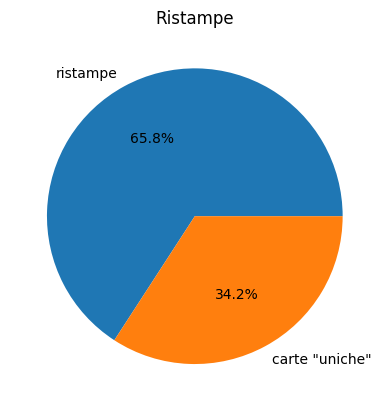

In [44]:
numRistampe = len(df.index) - len(uniqueCards.index)

labels = ['ristampe', 'carte "uniche"']
sizes = [numRistampe, len(uniqueCards.index)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Ristampe")
plt.show()

## Lingua

All'interno del dataset sono presenti carte in diversi linguaggi. Vediamo alcuni dati interessanti

In [45]:
df['lang'].value_counts()

lang
en     80703
es      1207
ja       463
fr       430
it       192
zhs       55
ph        48
de         5
ru         5
zht        5
pt         2
he         1
ko         1
sa         1
ar         1
grc        1
la         1
Name: count, dtype: int64

In [46]:
uniqueCards['lang'].value_counts()

lang
en     28088
es       150
ja        78
fr        39
it        27
ph         5
zhs        4
de         2
sa         1
Name: count, dtype: int64

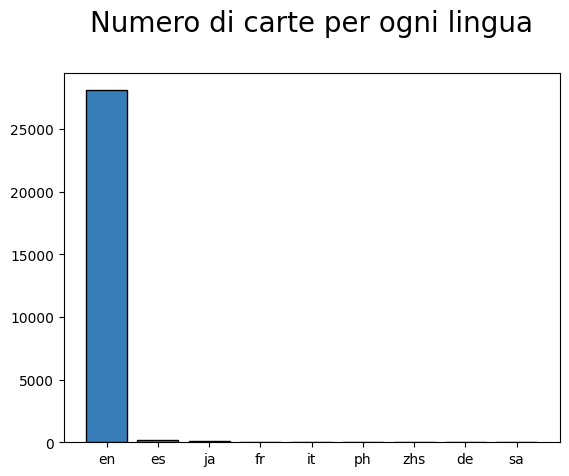

In [47]:
labels = uniqueCards['lang'].value_counts().keys()
sizes = uniqueCards['lang'].value_counts()
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

ax = plt.axes()
plt.title("Numero di carte per ogni lingua",pad =30,fontsize=20)
plt.bar(labels, sizes, color=colors, edgecolor='black')
plt.show()

## Colori

### Numero di carte per ogni colore

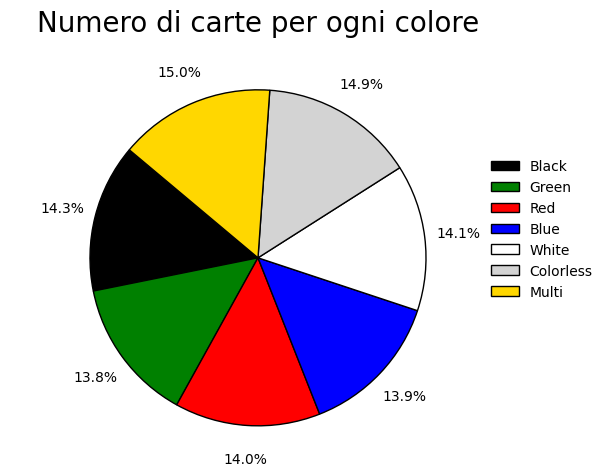

In [48]:
labels = colorCount.keys()
sizes = colorCount.values()
colors = ['Black', 'green', 'red', 'blue','white','lightgray','gold']

plt.title("Numero di carte per ogni colore",pad =30,fontsize=20)
plt.pie(sizes, colors=colors,autopct='%1.1f%%',pctdistance=1.2,startangle=140, wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True})
plt.legend(labels=labels,frameon=False,bbox_to_anchor=(0.7, 0.3, 0.5, 0.5))
plt.axis('equal')
plt.show()

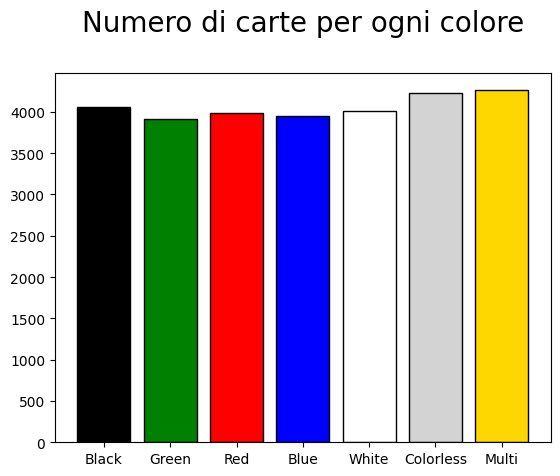

In [49]:
labels = colorCount.keys()
sizes = colorCount.values()
colors = ['Black', 'green', 'red', 'blue','white','lightgray','gold']

ax = plt.axes()
plt.title("Numero di carte per ogni colore",pad =30,fontsize=20)
plt.bar(labels, sizes, color=colors, edgecolor='black')
plt.show()

### Grafico a barre raggruppato

In [50]:
dfByType = pd.DataFrame(colorByType).transpose()

In [51]:
dfByType.head()

,Black,Green,Red,Blue,White,Colorless,Multi
creature,2220,2285,2133,1977,2216,637,2511
instant,430,432,531,736,572,6,333
sorcery,692,470,609,424,312,28,294
enchantment,452,452,419,555,619,3,242
planeswalker,25,30,38,30,31,6,126


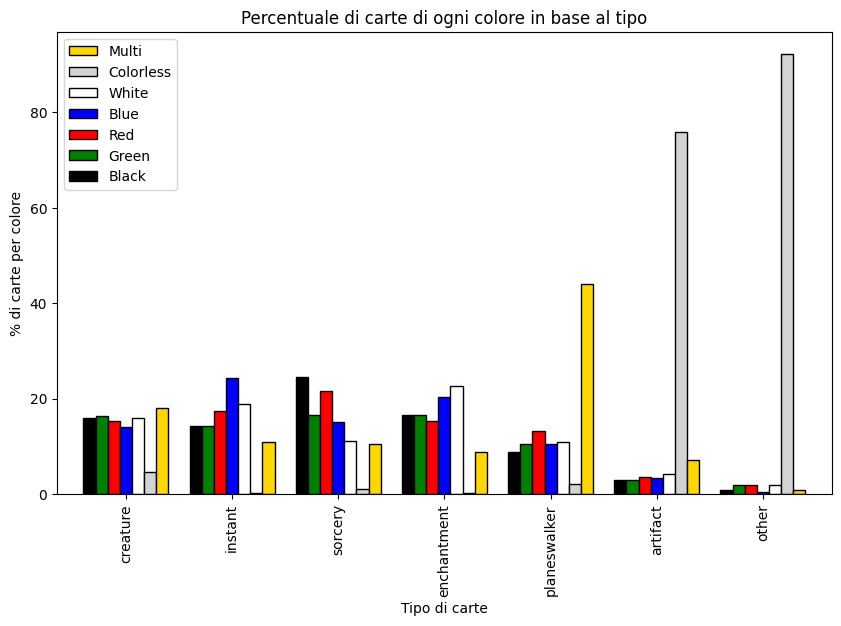

In [52]:
# calcolo le percentuali per ogni riga
row_sums = dfByType.sum(axis=1)
percentages = (dfByType.T / row_sums).T * 100

# creo il grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
percentages.plot(kind='bar', ax=ax, color=colors, width=0.8, edgecolor='black')

# imposto i titoli degli assi e della figura
ax.set_xlabel('Tipo di carte')
ax.set_ylabel('% di carte per colore')
ax.set_title('Percentuale di carte di ogni colore in base al tipo')

# aggiungo la legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left')

plt.show()

Può essere interessante anche vedere la versione "invertita" ovvero in cui le carte sono raggruppate per colore

In [53]:
dfByColor = dfByType.transpose()

In [54]:
dfByColor.head()

,creature,instant,sorcery,enchantment,planeswalker,artifact,other
Black,2220,430,692,452,25,56,2
Green,2285,432,470,452,30,54,4
Red,2133,531,609,419,38,66,4
Blue,1977,736,424,555,30,61,1
White,2216,572,312,619,31,80,4


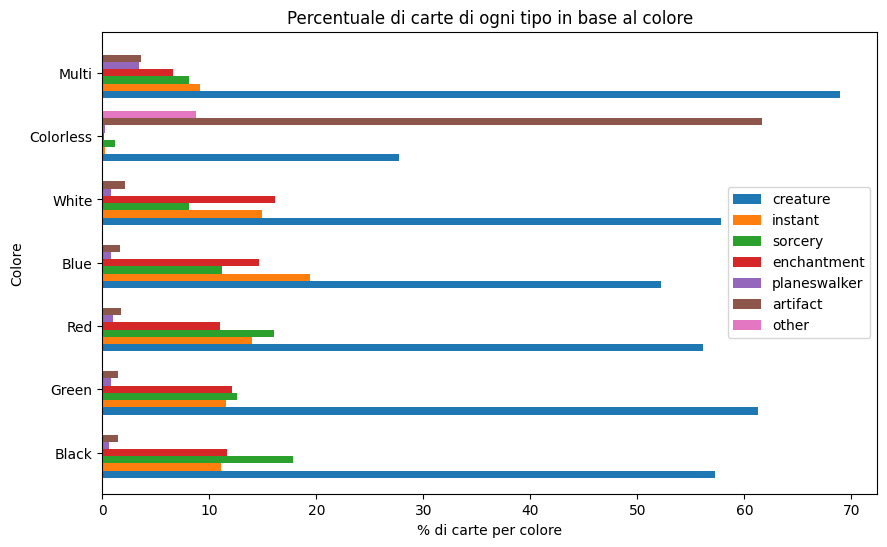

In [55]:
# calcolo le percentuali per ogni riga
row_sums = dfByColor.sum(axis=1)
percentages = (dfByColor.T / row_sums).T * 100

# creo il grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
percentages.plot(kind='barh', ax=ax, width=0.8)

# imposto i titoli degli assi e della figura
ax.set_xlabel('% di carte per colore')
ax.set_ylabel('Colore')
ax.set_title('Percentuale di carte di ogni tipo in base al colore')

# aggiungo la legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='center right')



plt.show()

### Distribuzione del numero di colori per carta

#### Generale

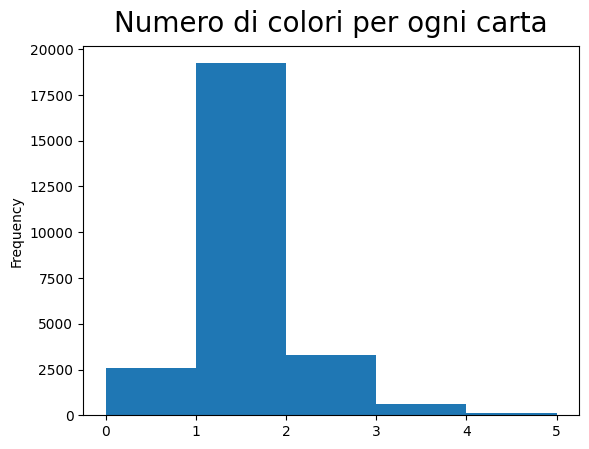

In [56]:
normalCards['num_colors'].plot.hist(bins=5)
plt.title("Numero di colori per ogni carta",pad=10,fontsize=20)
plt.show()

#### Creature

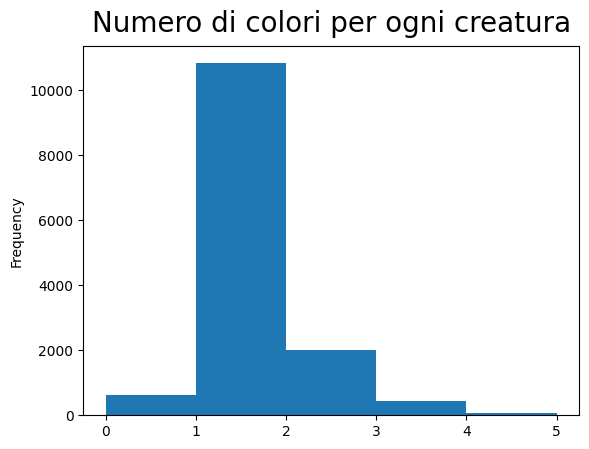

In [57]:
creatureCards['num_colors'].plot.hist(bins=5)
plt.title("Numero di colori per ogni creatura",pad=10,fontsize=20)
plt.show()

#### Instant

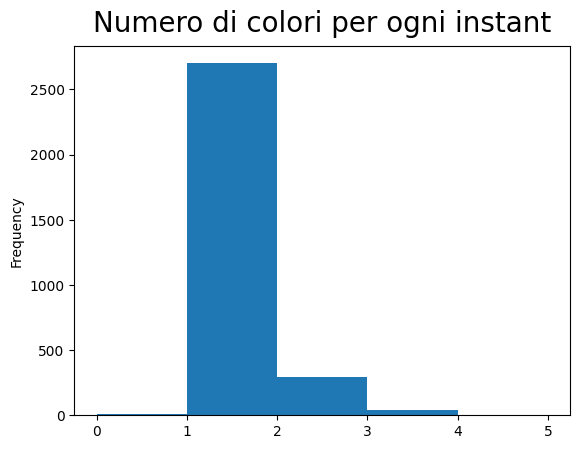

In [58]:
instantCards['num_colors'].plot.hist(bins=5)
plt.title("Numero di colori per ogni instant",pad=10,fontsize=20)
plt.show()

#### Sorcery

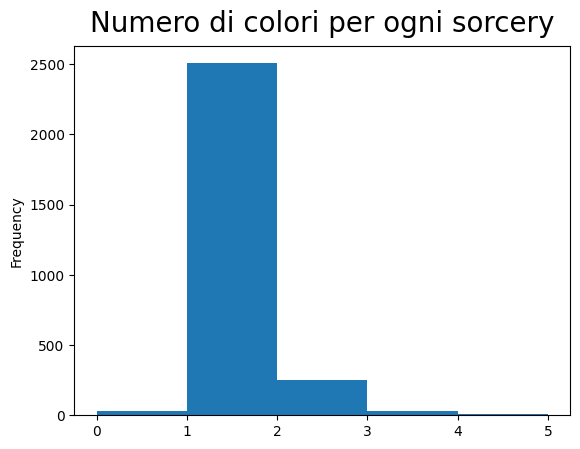

In [59]:
sorceryCards['num_colors'].plot.hist(bins=5)
plt.title("Numero di colori per ogni sorcery",pad=10,fontsize=20)
plt.show()

#### Enchantment

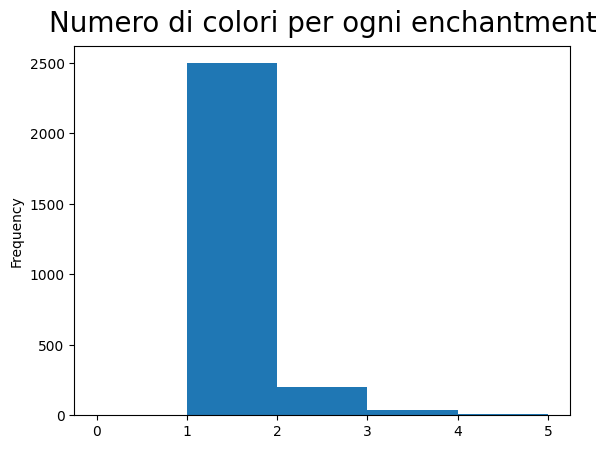

In [60]:
enchantmentCards['num_colors'].plot.hist(bins=5)
plt.title("Numero di colori per ogni enchantment",pad=10,fontsize=20)
plt.show()

#### Planeswalker

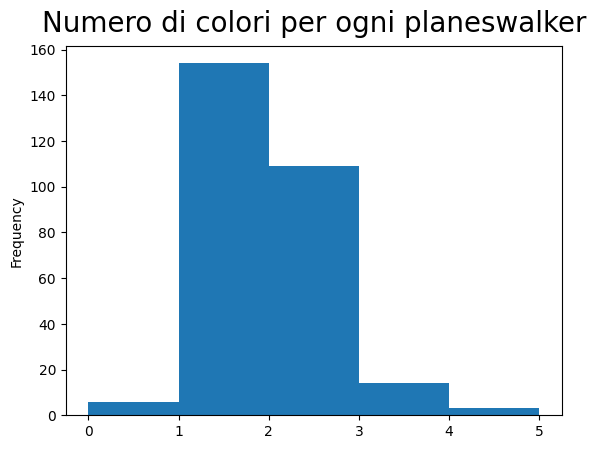

In [61]:
planeswalkerCards['num_colors'].plot.hist(bins=5)
plt.title("Numero di colori per ogni planeswalker",pad=10,fontsize=20)
plt.show()

#### Artifact

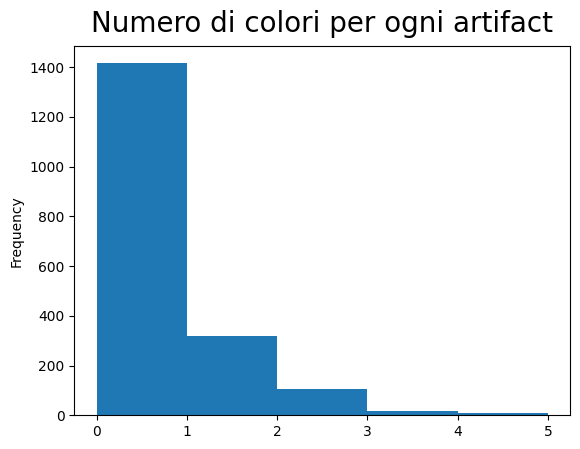

In [62]:
artifactCards['num_colors'].plot.hist(bins=5)
plt.title("Numero di colori per ogni artifact",pad=10,fontsize=20)
plt.show()

#### Land

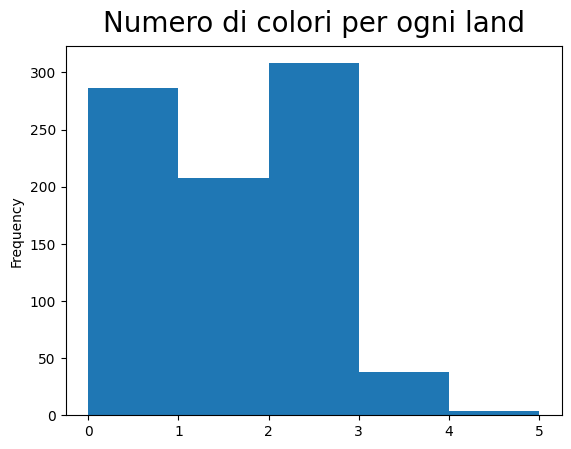

In [63]:
landCards['num_colors'].plot.hist(bins=5)
plt.title("Numero di colori per ogni land",pad=10,fontsize=20)
plt.show()

#### Other

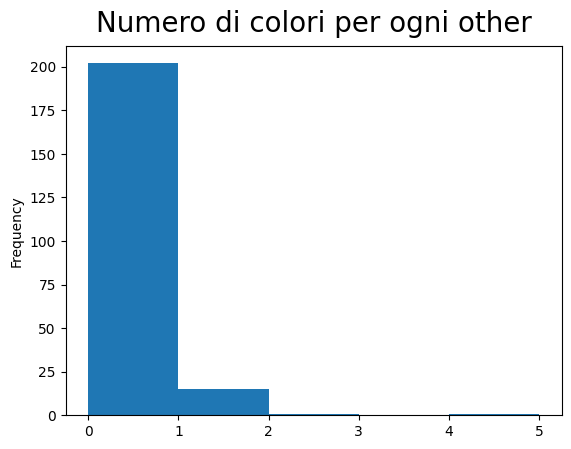

In [64]:
otherCards['num_colors'].plot.hist(bins=5)
plt.title("Numero di colori per ogni other",pad=10,fontsize=20)
plt.show()

#### Con Seaborn

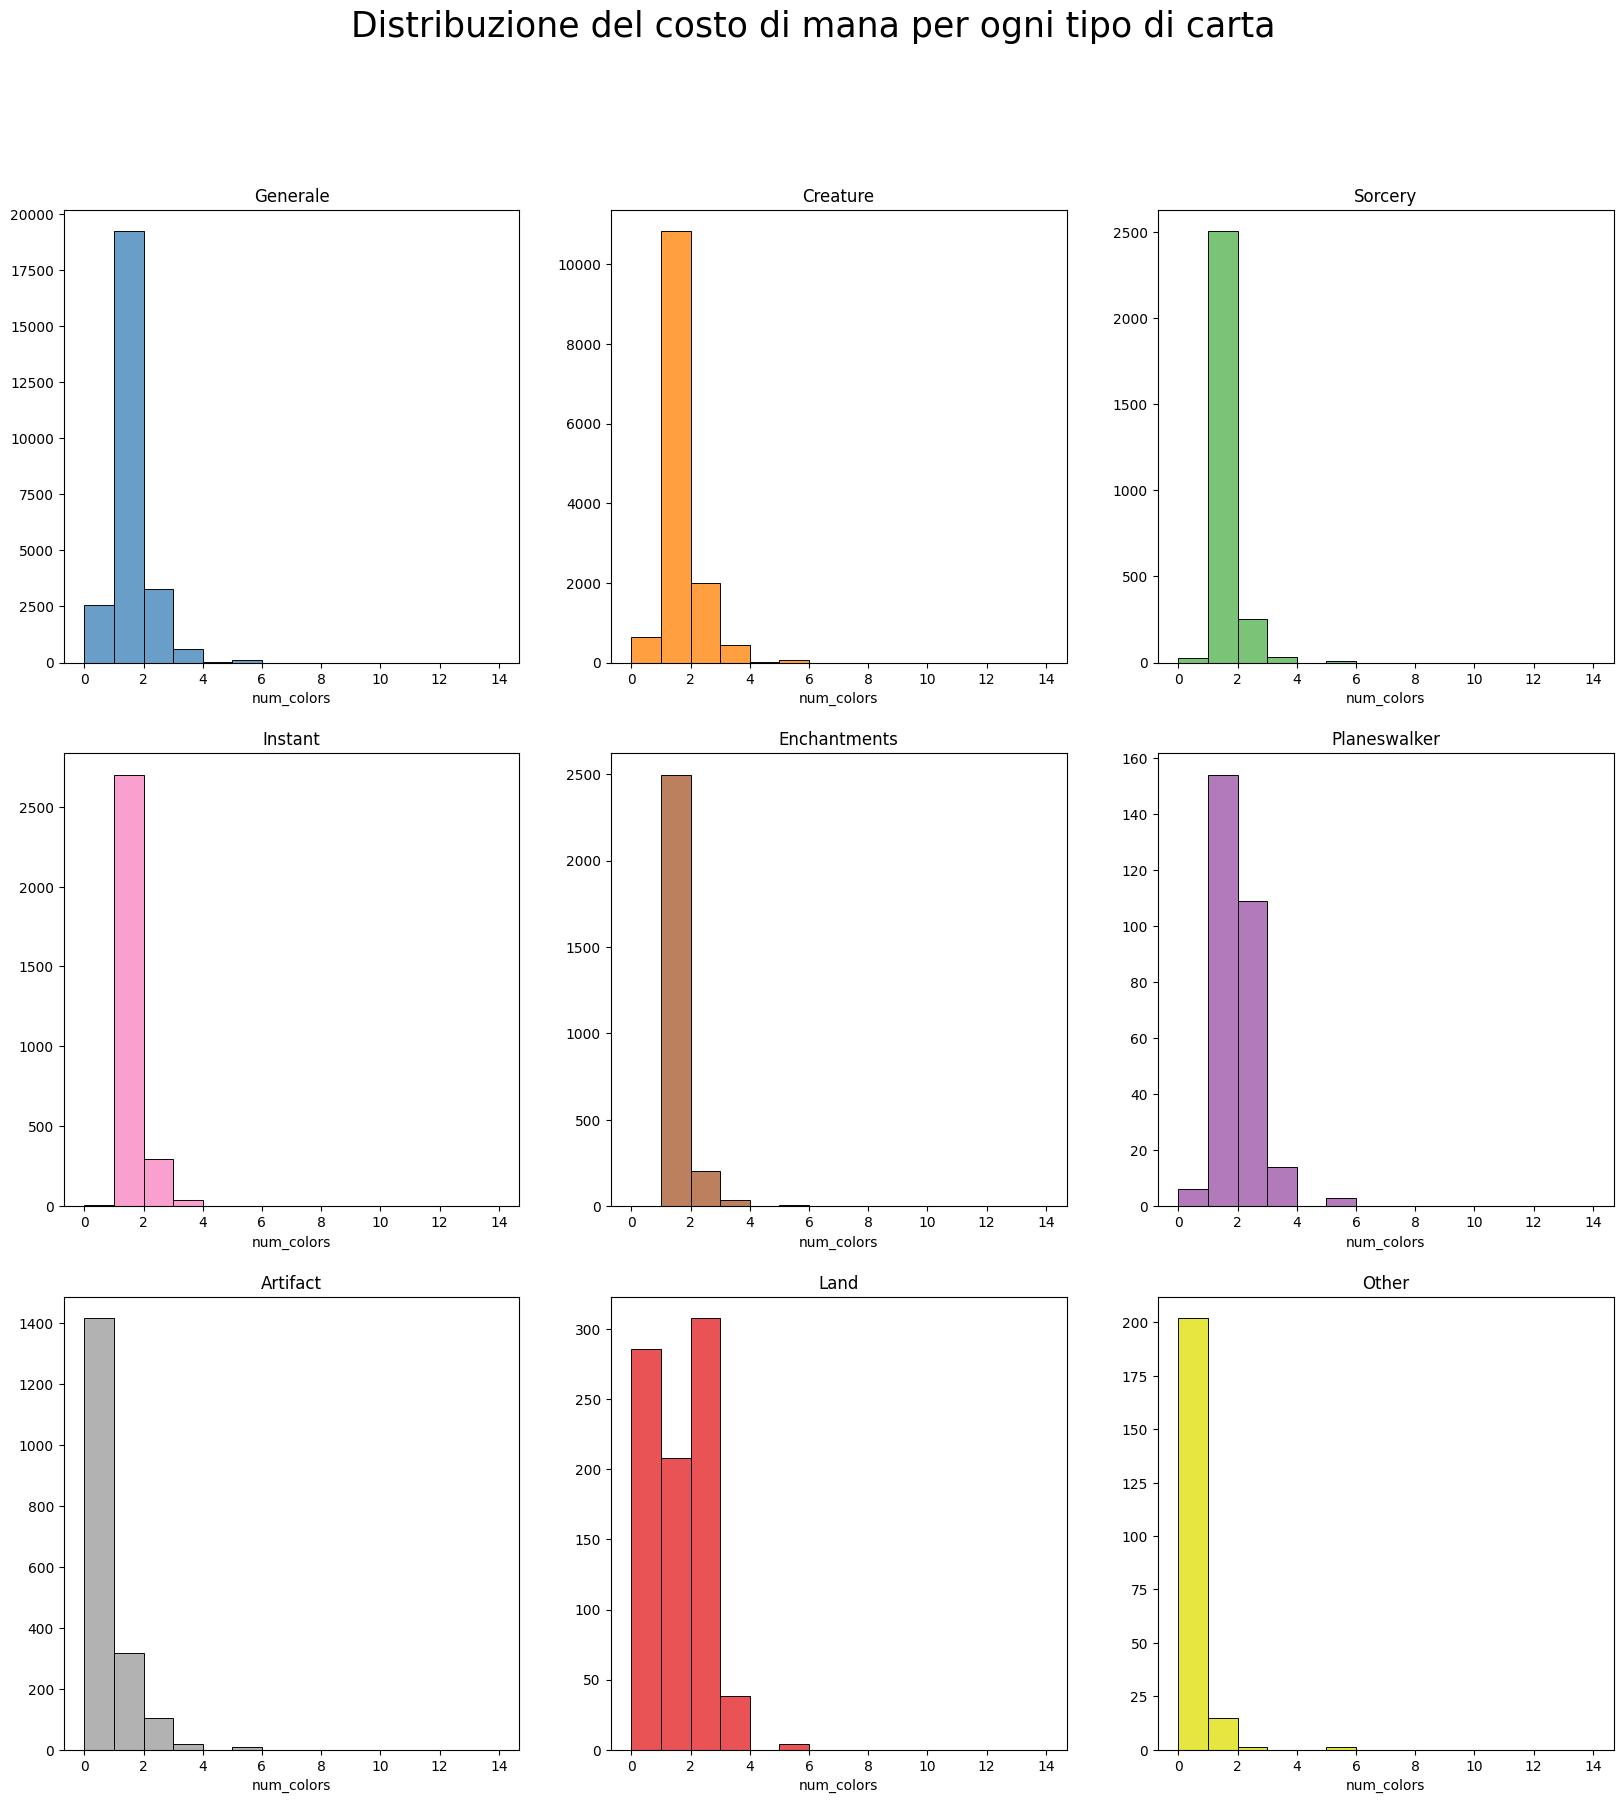

In [65]:
fig, axs = plt.subplots(3, 3)
fig.suptitle("Distribuzione del costo di mana per ogni tipo di carta", fontsize=25)

sns.histplot(x=normalCards['num_colors'], bins=range(0,15), ax=axs[0,0], color='#377eb8')
axs[0,0].set_title("Generale")
axs[0,0].set_ylabel('')

sns.histplot(x=creatureCards['num_colors'], bins=range(0,15), ax=axs[0,1], color='#ff7f00')
axs[0,1].set_title("Creature")
axs[0,1].set_ylabel('')

sns.histplot(x=sorceryCards['num_colors'], bins=range(0,15), ax=axs[0,2], color='#4daf4a')
axs[0,2].set_title("Sorcery")
axs[0,2].set_ylabel('')

sns.histplot(x=instantCards['num_colors'], bins=range(0,15), ax=axs[1,0], color='#f781bf')
axs[1,0].set_title("Instant")
axs[1,0].set_ylabel('')

sns.histplot(x=enchantmentCards['num_colors'], bins=range(0,15), ax=axs[1,1], color='#a65628')
axs[1,1].set_title("Enchantments")
axs[1,1].set_ylabel('')

sns.histplot(x=planeswalkerCards['num_colors'], bins=range(0,15), ax=axs[1,2], color='#984ea3')
axs[1,2].set_title("Planeswalker")
axs[1,2].set_ylabel('')

sns.histplot(x=artifactCards['num_colors'], bins=range(0,15), ax=axs[2,0], color='#999999')
axs[2,0].set_title("Artifact")
axs[2,0].set_ylabel('')

sns.histplot(x=landCards['num_colors'], bins=range(0,15), ax=axs[2,1], color='#e41a1c')
axs[2,1].set_title("Land")
axs[2,1].set_ylabel('')

sns.histplot(x=otherCards['num_colors'], bins=range(0,15), ax=axs[2,2],color='#dede00')
axs[2,2].set_title("Other")
axs[2,2].set_ylabel('')

fig.set_size_inches(20,20)

plt.show()

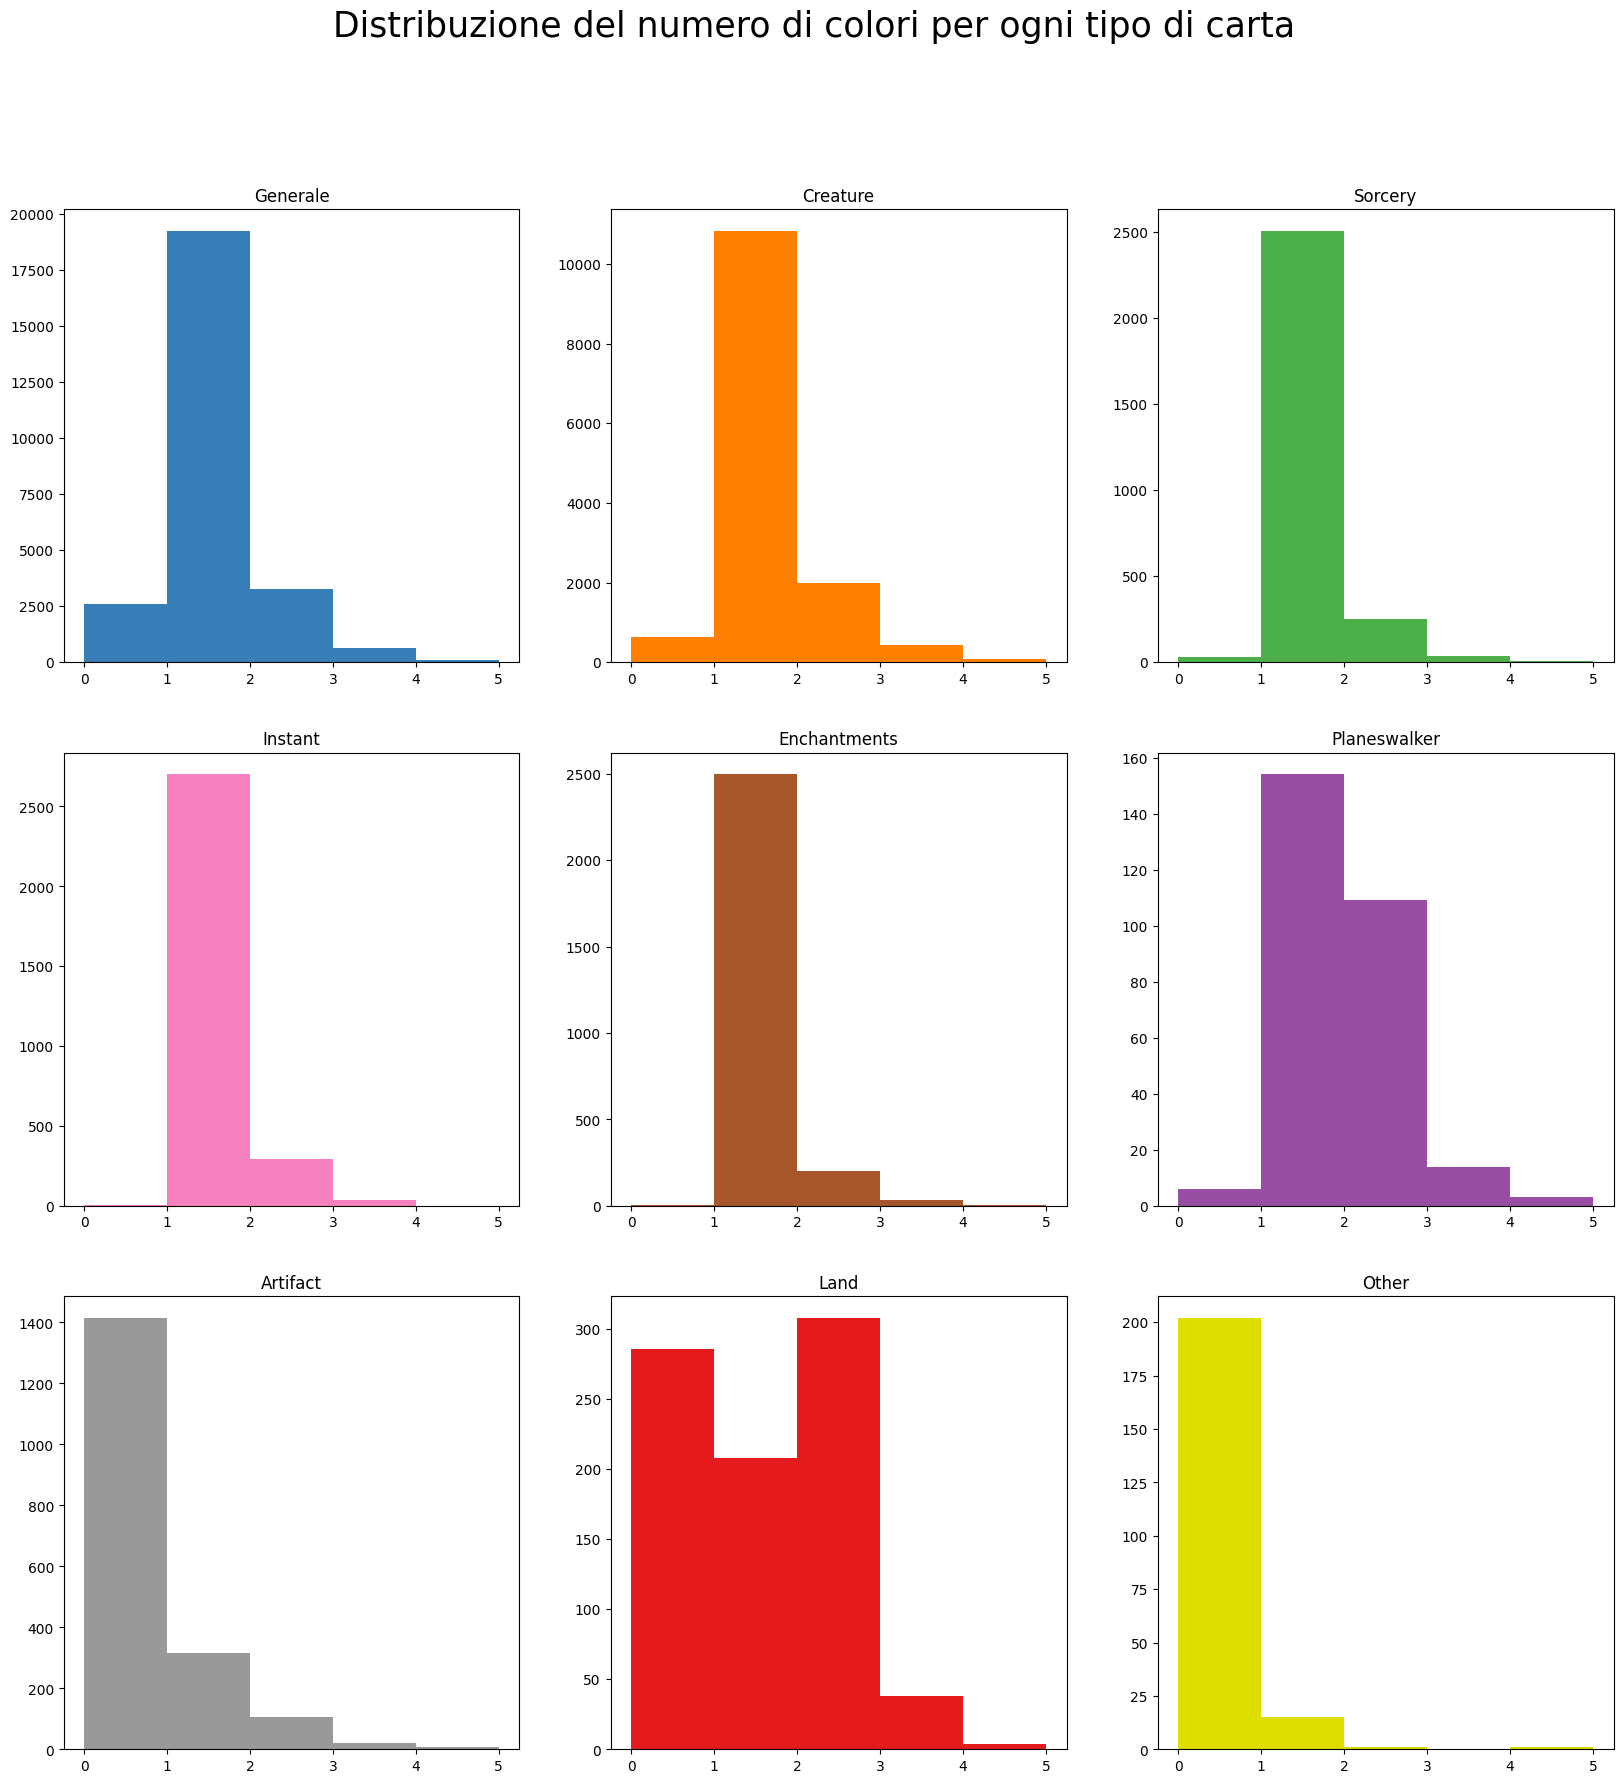

In [66]:
fig, axs = plt.subplots(3, 3)
fig.suptitle("Distribuzione del numero di colori per ogni tipo di carta", fontsize=25)

normalCards['num_colors'].plot.hist(bins=5, ax=axs[0,0], color='#377eb8')
axs[0,0].set_title("Generale")
axs[0,0].set_ylabel('')

creatureCards['num_colors'].plot.hist(bins=5, ax=axs[0,1], color='#ff7f00')
axs[0,1].set_title("Creature")
axs[0,1].set_ylabel('')

sorceryCards['num_colors'].plot.hist(bins=5, ax=axs[0,2], color='#4daf4a')
axs[0,2].set_title("Sorcery")
axs[0,2].set_ylabel('')

instantCards['num_colors'].plot.hist(bins=5, ax=axs[1,0], color='#f781bf')
axs[1,0].set_title("Instant")
axs[1,0].set_ylabel('')

enchantmentCards['num_colors'].plot.hist(bins=5, ax=axs[1,1], color='#a65628')
axs[1,1].set_title("Enchantments")
axs[1,1].set_ylabel('')

planeswalkerCards['num_colors'].plot.hist(bins=5, ax=axs[1,2], color='#984ea3')
axs[1,2].set_title("Planeswalker")
axs[1,2].set_ylabel('')

artifactCards['num_colors'].plot.hist(bins=5, ax=axs[2,0], color='#999999')
axs[2,0].set_title("Artifact")
axs[2,0].set_ylabel('')

landCards['num_colors'].plot.hist(bins=5, ax=axs[2,1], color='#e41a1c')
axs[2,1].set_title("Land")
axs[2,1].set_ylabel('')

otherCards['num_colors'].plot.hist(bins=5, ax=axs[2,2],color='#dede00')
axs[2,2].set_title("Other")
axs[2,2].set_ylabel('')

fig.set_size_inches(20,20)

plt.show()

## Mana

### Distribuzione del costo in mana delle carte

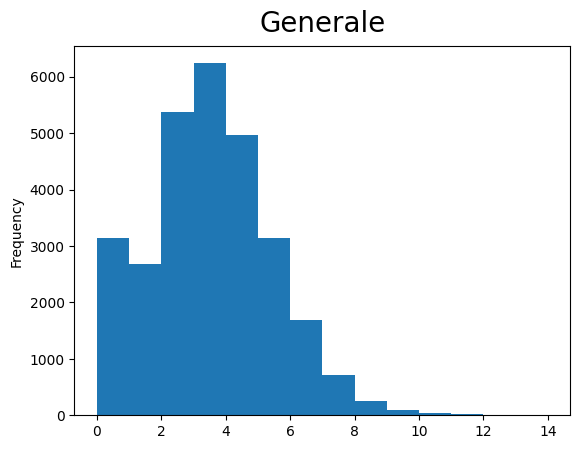

In [67]:
uniqueCards['cmc'].plot.hist(bins=range(0, 15))
plt.title("Generale",pad=10,fontsize=20)
plt.show()

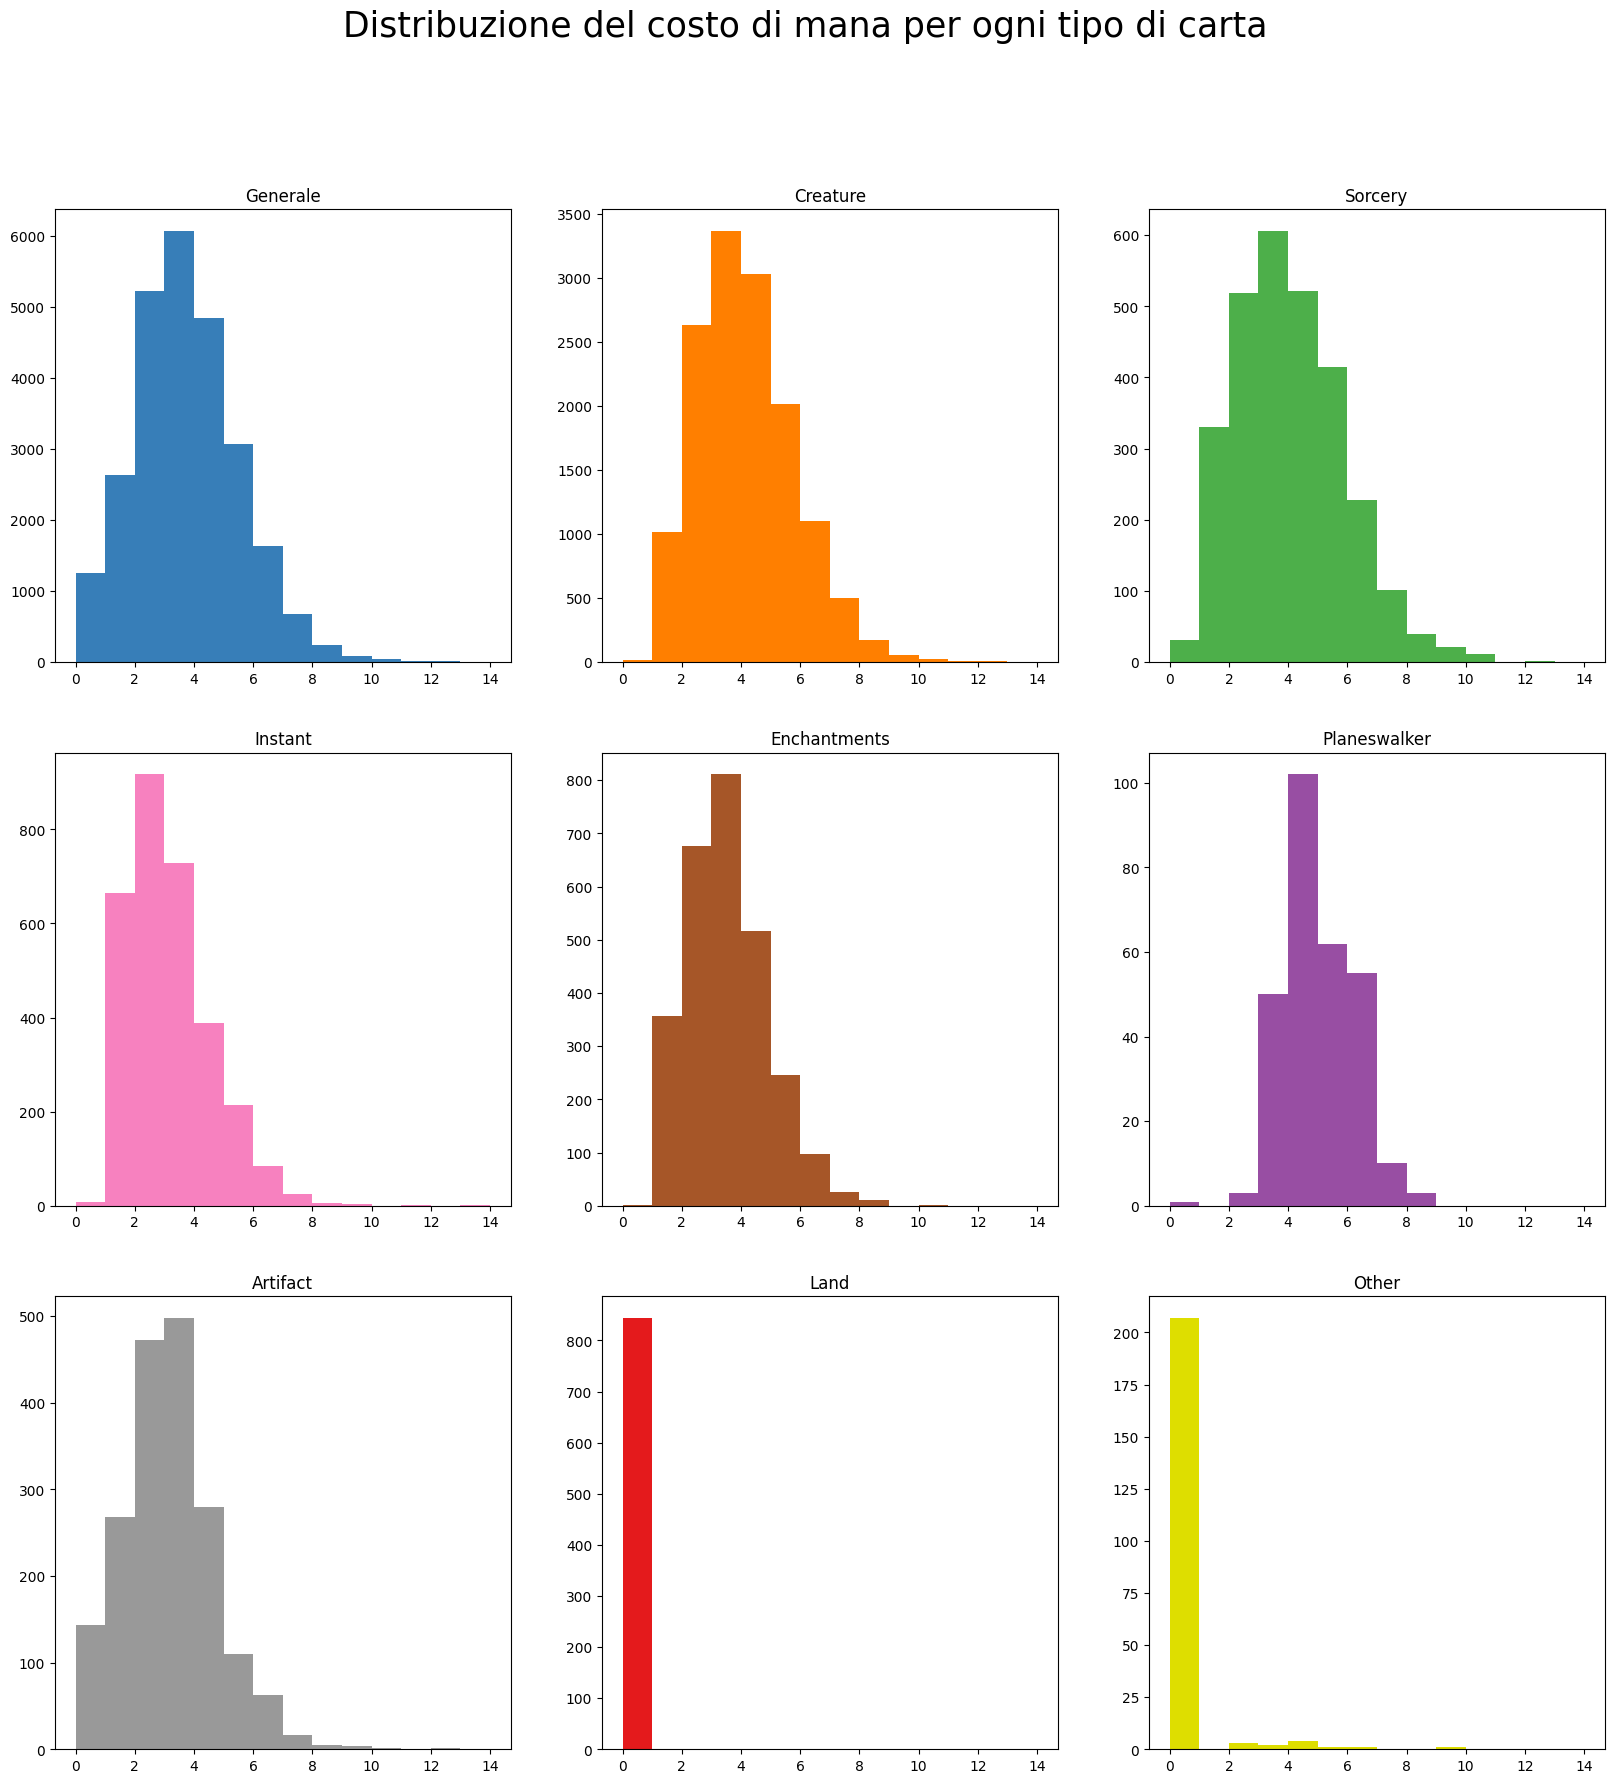

In [68]:
fig, axs = plt.subplots(3, 3)
fig.suptitle("Distribuzione del costo di mana per ogni tipo di carta", fontsize=25)

normalCards['cmc'].plot.hist(bins=range(0, 15), ax=axs[0,0], color='#377eb8')
axs[0,0].set_title("Generale")
axs[0,0].set_ylabel('')

creatureCards['cmc'].plot.hist(bins=range(0, 15), ax=axs[0,1], color='#ff7f00')
axs[0,1].set_title("Creature")
axs[0,1].set_ylabel('')

sorceryCards['cmc'].plot.hist(bins=range(0, 15), ax=axs[0,2], color='#4daf4a')
axs[0,2].set_title("Sorcery")
axs[0,2].set_ylabel('')

instantCards['cmc'].plot.hist(bins=range(0, 15), ax=axs[1,0], color='#f781bf')
axs[1,0].set_title("Instant")
axs[1,0].set_ylabel('')

enchantmentCards['cmc'].plot.hist(bins=range(0, 15), ax=axs[1,1], color='#a65628')
axs[1,1].set_title("Enchantments")
axs[1,1].set_ylabel('')

planeswalkerCards['cmc'].plot.hist(bins=range(0, 15), ax=axs[1,2], color='#984ea3')
axs[1,2].set_title("Planeswalker")
axs[1,2].set_ylabel('')

artifactCards['cmc'].plot.hist(bins=range(0, 15), ax=axs[2,0], color='#999999')
axs[2,0].set_title("Artifact")
axs[2,0].set_ylabel('')

landCards['cmc'].plot.hist(bins=range(0, 15), ax=axs[2,1], color='#e41a1c')
axs[2,1].set_title("Land")
axs[2,1].set_ylabel('')

otherCards['cmc'].plot.hist(bins=range(0, 15), ax=axs[2,2],color='#dede00')
axs[2,2].set_title("Other")
axs[2,2].set_ylabel('')

fig.set_size_inches(20,20)

plt.show()

#### Con Seaborn

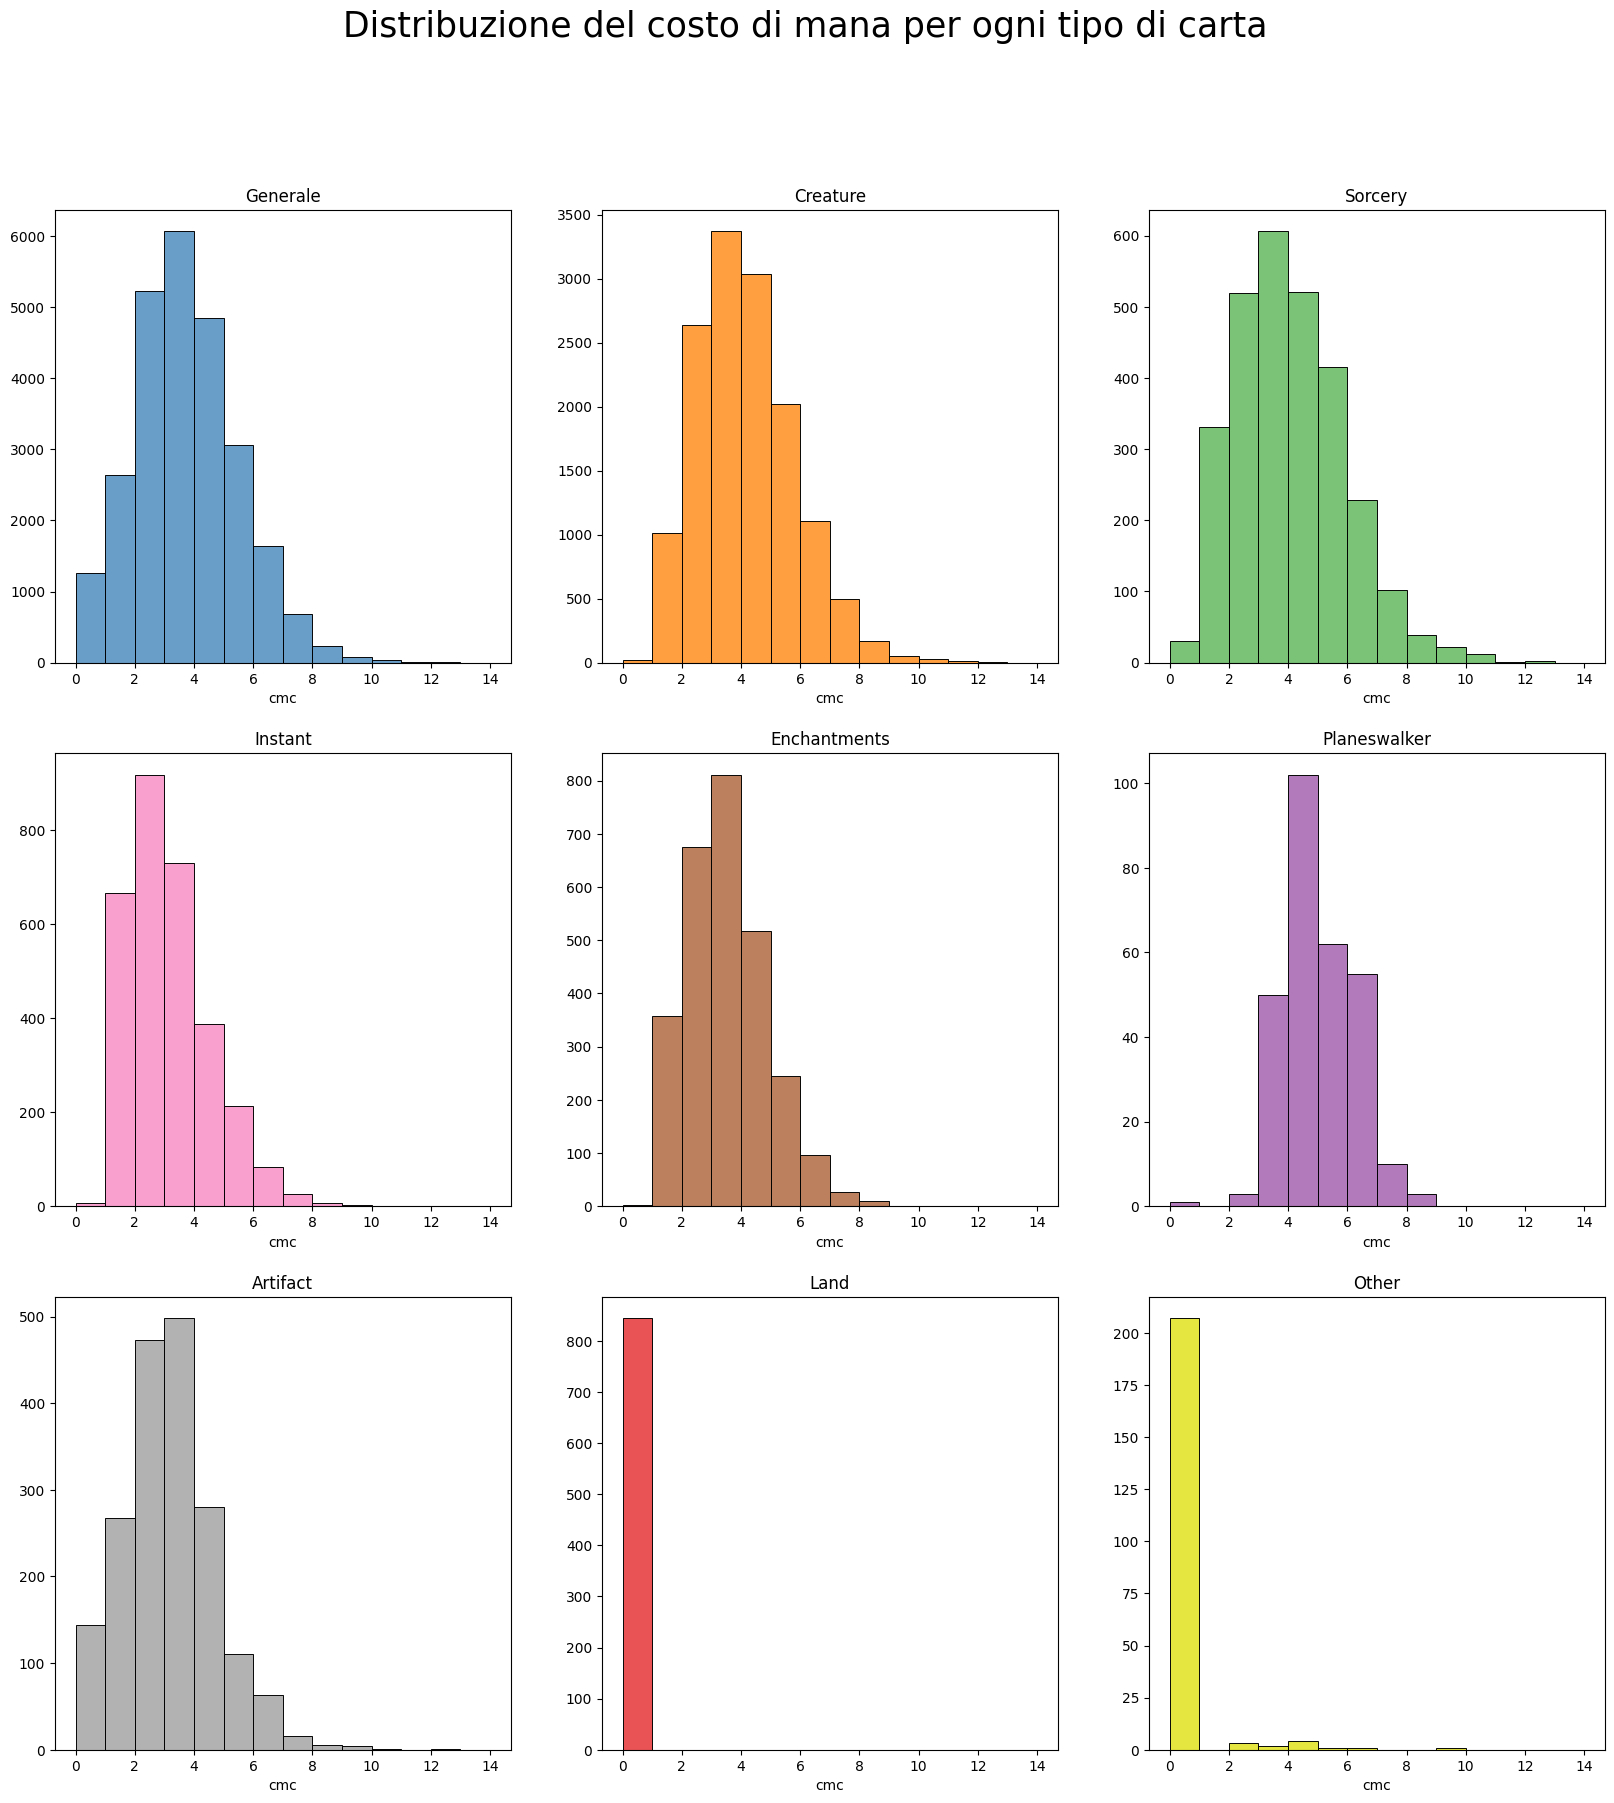

In [69]:
fig, axs = plt.subplots(3, 3)
fig.suptitle("Distribuzione del costo di mana per ogni tipo di carta", fontsize=25)

sns.histplot(x=normalCards['cmc'], bins=range(0,15), ax=axs[0,0], color='#377eb8')
axs[0,0].set_title("Generale")
axs[0,0].set_ylabel('')

sns.histplot(x=creatureCards['cmc'], bins=range(0,15), ax=axs[0,1], color='#ff7f00')
axs[0,1].set_title("Creature")
axs[0,1].set_ylabel('')

sns.histplot(x=sorceryCards['cmc'], bins=range(0,15), ax=axs[0,2], color='#4daf4a')
axs[0,2].set_title("Sorcery")
axs[0,2].set_ylabel('')

sns.histplot(x=instantCards['cmc'], bins=range(0,15), ax=axs[1,0], color='#f781bf')
axs[1,0].set_title("Instant")
axs[1,0].set_ylabel('')

sns.histplot(x=enchantmentCards['cmc'], bins=range(0,15), ax=axs[1,1], color='#a65628')
axs[1,1].set_title("Enchantments")
axs[1,1].set_ylabel('')

sns.histplot(x=planeswalkerCards['cmc'], bins=range(0,15), ax=axs[1,2], color='#984ea3')
axs[1,2].set_title("Planeswalker")
axs[1,2].set_ylabel('')

sns.histplot(x=artifactCards['cmc'], bins=range(0,15), ax=axs[2,0], color='#999999')
axs[2,0].set_title("Artifact")
axs[2,0].set_ylabel('')

sns.histplot(x=landCards['cmc'], bins=range(0,15), ax=axs[2,1], color='#e41a1c')
axs[2,1].set_title("Land")
axs[2,1].set_ylabel('')

sns.histplot(x=otherCards['cmc'], bins=range(0,15), ax=axs[2,2],color='#dede00')
axs[2,2].set_title("Other")
axs[2,2].set_ylabel('')

fig.set_size_inches(20,20)

plt.show()

## Tipo

Vediamo ora dei grafici che mostrano il numero di carte per ogni tipo

In [70]:
typeCount = {
    'Creature': len(creatureCards.index),
    'Instant': len(instantCards.index),
    'Sorcery': len(sorceryCards.index),
    'Enchantment': len(enchantmentCards.index),
    'Planeswalker': len(planeswalkerCards.index),
    'Artifact': len(artifactCards.index),
    'Other': len(otherCards.index)
}

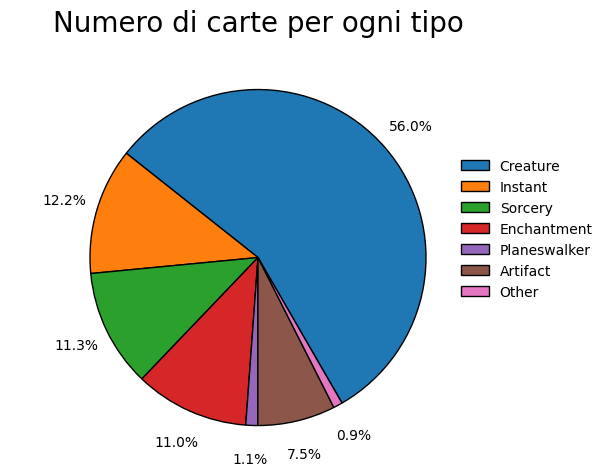

In [71]:
labels = typeCount.keys()
sizes = typeCount.values()

plt.title("Numero di carte per ogni tipo",pad =30,fontsize=20)
plt.pie(sizes,autopct='%1.1f%%',pctdistance=1.2, startangle=300, wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True})
plt.legend(labels=labels,frameon=False,bbox_to_anchor=(0.7, 0.3, 0.5, 0.5))
plt.axis('equal')
plt.show()

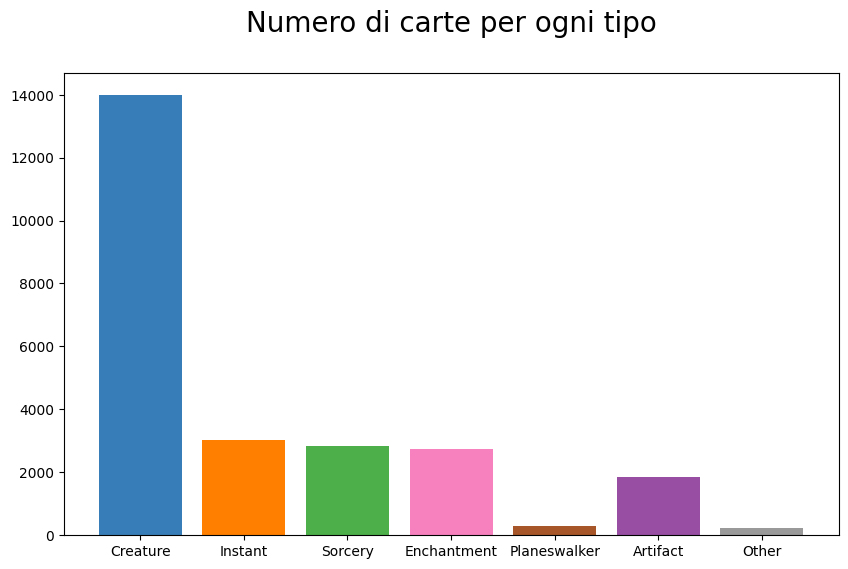

In [72]:
labels = typeCount.keys()
sizes = typeCount.values()
colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

fig, ax = plt.subplots(figsize=(10, 6))
plt.title("Numero di carte per ogni tipo",pad =30,fontsize=20)
plt.bar(labels, sizes, color=colors)
plt.show()

## Giochi online

### Carte presenti su MTG Arena

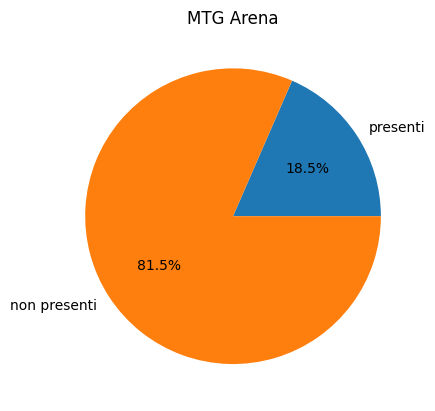

In [73]:
nonPresentiMtga = len(uniqueCards.index) - mtgaCountAll
labels = ['presenti', 'non presenti']
sizes = [mtgaCountAll, nonPresentiMtga]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("MTG Arena")
plt.show()

### Carte presenti su MTG Online

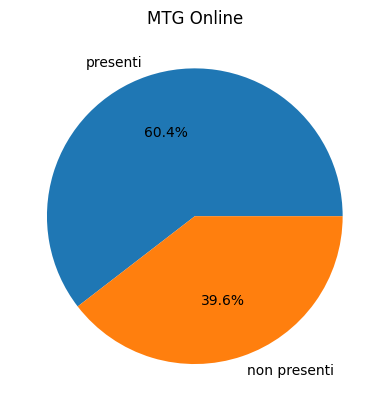

In [74]:
nonPresentiMtgo = len(uniqueCards.index) - mtgoCountAll
labels = ['presenti', 'non presenti']
sizes = [mtgoCountAll, nonPresentiMtgo]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("MTG Online")
plt.show()

## Rarità

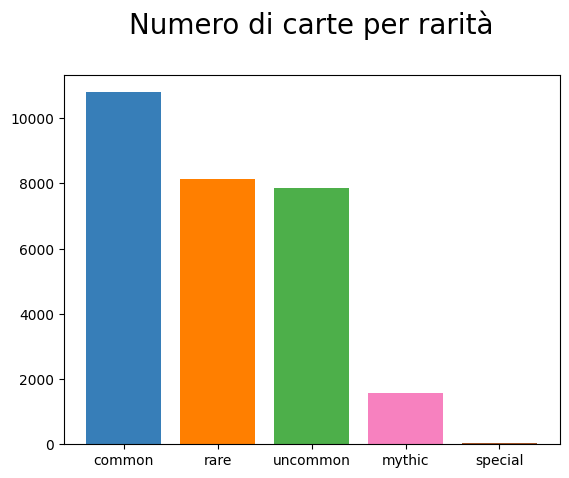

In [75]:
labels = uniqueCards['rarity'].value_counts().keys()
sizes = uniqueCards['rarity'].value_counts()

ax = plt.axes()
plt.title("Numero di carte per rarità",pad =30,fontsize=20)
plt.bar(labels, sizes, color=colors)
plt.show()

## Prezzo

In [76]:
# Seleziono solo le colonne di interesse 
prezzi = uniqueCards[['name', 'edhrec_rank', 'rarity', 'prices']]

# Rimuovo le carte con prezzo mancante 
prezzi = prezzi.dropna()

prezzi.head()

,name,edhrec_rank,rarity,prices
0,Fury Sliver,6118.0,uncommon,"{'usd': '0.40', 'usd_foil': '4.24', 'usd_etche..."
1,Kor Outfitter,15159.0,common,"{'usd': '0.27', 'usd_foil': '7.42', 'usd_etche..."
3,Siren Lookout,13503.0,common,"{'usd': '0.04', 'usd_foil': '0.19', 'usd_etche..."
4,Web,20508.0,rare,"{'usd': '0.63', 'usd_foil': None, 'usd_etched'..."
5,Venerable Knight,13095.0,uncommon,"{'usd': '0.11', 'usd_foil': '0.29', 'usd_etche..."


Aggiungo una colonna nella quale ricavo il valore float del prezzo in usd di ogni carta

In [77]:
def get_usd(row):
    try:
        return float(row['prices']['usd'])
    except:
        return None

prezzi['price_usd'] = prezzi.apply(get_usd, axis=1)
prezzi = prezzi[prezzi['price_usd'].notna()]

In [78]:
prezzi.head()

,name,edhrec_rank,rarity,prices,price_usd
0,Fury Sliver,6118.0,uncommon,"{'usd': '0.40', 'usd_foil': '4.24', 'usd_etche...",0.40
1,Kor Outfitter,15159.0,common,"{'usd': '0.27', 'usd_foil': '7.42', 'usd_etche...",0.27
3,Siren Lookout,13503.0,common,"{'usd': '0.04', 'usd_foil': '0.19', 'usd_etche...",0.04
4,Web,20508.0,rare,"{'usd': '0.63', 'usd_foil': None, 'usd_etched'...",0.63
5,Venerable Knight,13095.0,uncommon,"{'usd': '0.11', 'usd_foil': '0.29', 'usd_etche...",0.11


Definisco una funzione per aggiungere un label con il valore della mediana all'interno dei boxplot

In [79]:
import matplotlib.patheffects as path_effects

def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

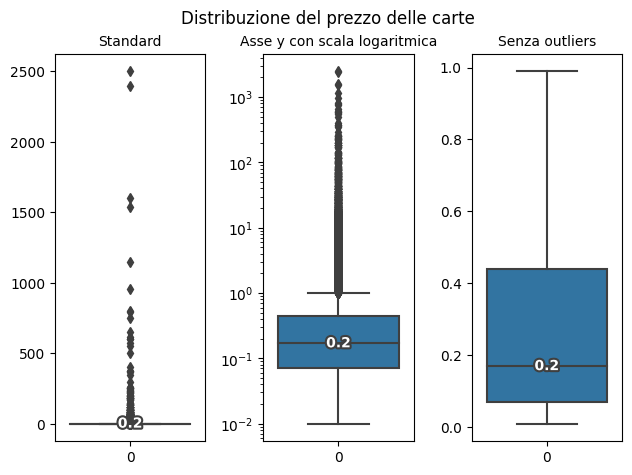

In [80]:
fig, axs = plt.subplots(1, 3)
fig.suptitle("Distribuzione del prezzo delle carte")
fig.tight_layout()

ax1 = sns.boxplot(prezzi['price_usd'], ax=axs[0])
ax1.set_title("Standard", fontsize=10)
add_median_labels(ax1)

ax2 = sns.boxplot(prezzi['price_usd'], ax=axs[1])
ax2.set_yscale('log')
ax2.set_title('Asse y con scala logaritmica', fontsize=10)
add_median_labels(ax2)

ax3 = sns.boxplot(prezzi['price_usd'], showfliers=False)
ax3.set_title("Senza outliers", fontsize=10)
add_median_labels(ax3)

plt.show()

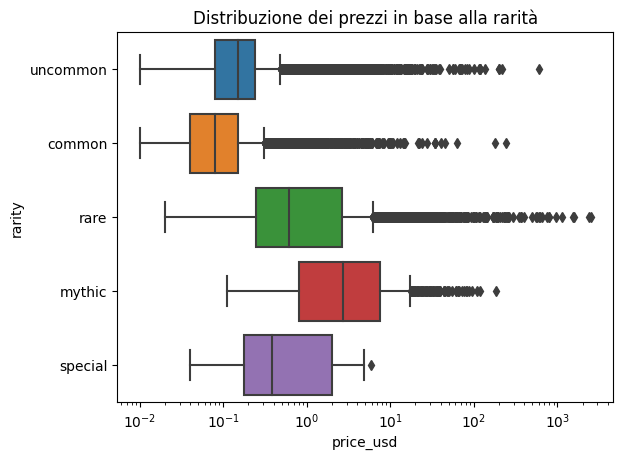

In [81]:
sns.boxplot(x=prezzi['price_usd'], y=prezzi['rarity'])
plt.title("Distribuzione dei prezzi in base alla rarità")
plt.xscale('log')
plt.show()

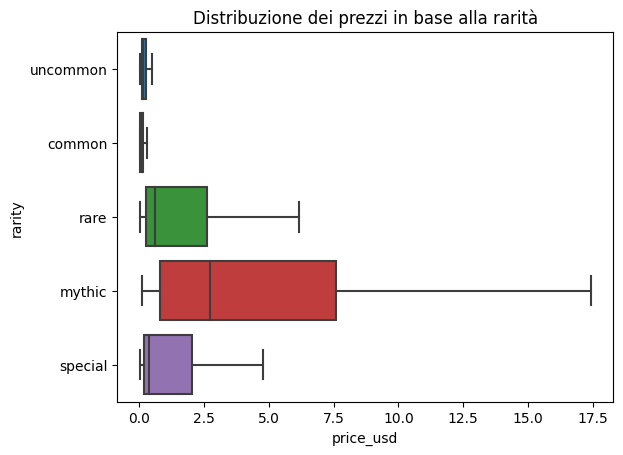

In [82]:
sns.boxplot(x=prezzi['price_usd'], y=prezzi['rarity'], showfliers=False)
plt.title("Distribuzione dei prezzi in base alla rarità")
plt.show()

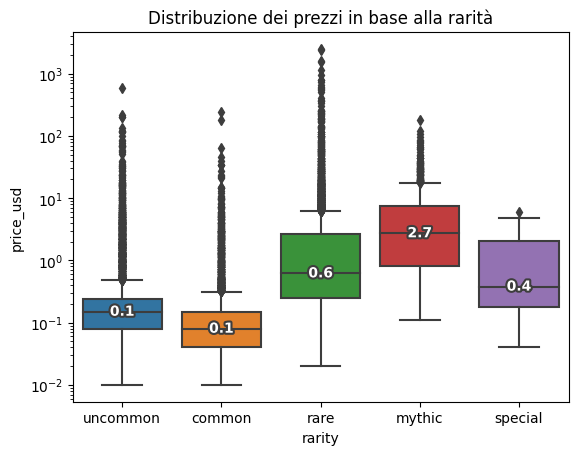

In [83]:
ax = sns.boxplot(data=prezzi, y='price_usd', x='rarity')
plt.yscale('log')
add_median_labels(ax)
plt.title("Distribuzione dei prezzi in base alla rarità")
plt.show()

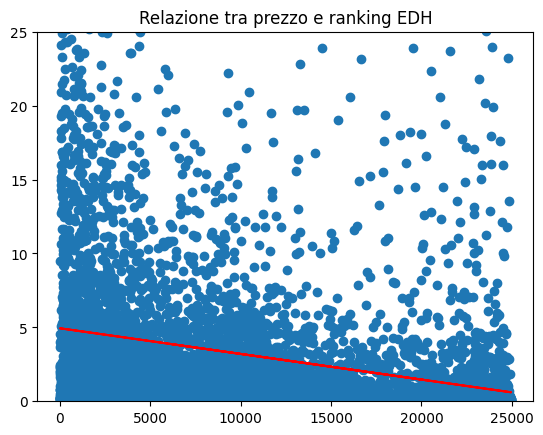

In [84]:
plt.scatter(prezzi['edhrec_rank'], prezzi['price_usd'])
plt.title("Relazione tra prezzo e ranking EDH")
plt.ylim(0, 25)

m, b = np.polyfit(prezzi['edhrec_rank'], prezzi['price_usd'], 1)
plt.plot(prezzi['edhrec_rank'], m*prezzi['edhrec_rank']+b, color='red')


plt.show()

Considerando una fascia di prezzo relativamente ristretta è possibile osservare che esiste una relazione tra il ranking EDH e il prezzo delle carte. Infatti a ranking più alti (valori più bassi dell'asse x nel grafico) corrispondono prezzi più alti

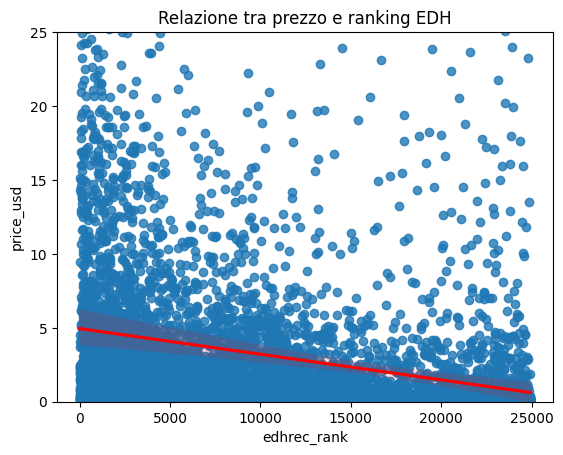

In [85]:
sns.regplot(data=prezzi, x=prezzi['edhrec_rank'], y=prezzi['price_usd'], line_kws={"color": "red"})
plt.title("Relazione tra prezzo e ranking EDH")
plt.ylim(0,25)
plt.show()

## Forza e Costituzione

In [86]:
#Seleziono solo le colonne di interesse
pt_df = creatureCards[['power', 'toughness', 'cmc']]
pt_df = pt_df.dropna()
pt_df.shape

(13978, 3)

In [87]:
def convert_power(row):
    try:
        return float(row['power'])
    except:
        return None
    
def convert_toughness(row):
    try:
        return float(row['toughness'])
    except:
        return None
    
def convert_cmc(row):
    try:
        return float(row['cmc'])
    except:
        return None

In [88]:
pt_df['power'] = pt_df.apply(convert_power, axis=1)
pt_df = pt_df[pt_df['power'].notna()]

pt_df['toughness'] = pt_df.apply(convert_toughness, axis=1)
pt_df = pt_df[pt_df['toughness'].notna()]

pt_df['cmc'] = pt_df.apply(convert_cmc, axis=1)
pt_df = pt_df[pt_df['cmc'].notna()]

In [89]:
pt_df.head()

,power,toughness,cmc
0,3.0,3.0,6.0
1,2.0,2.0,2.0
2,1.0,2.0,3.0
3,2.0,1.0,1.0
4,3.0,1.0,3.0


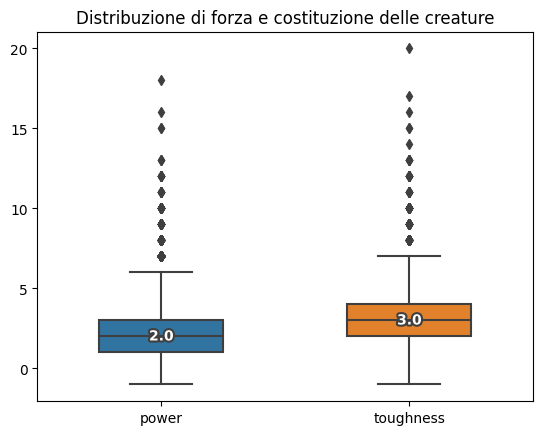

In [90]:
ax = sns.boxplot(data=pt_df[['power', 'toughness']], width=0.5)
add_median_labels(ax)
plt.title("Distribuzione di forza e costituzione delle creature")
plt.show()

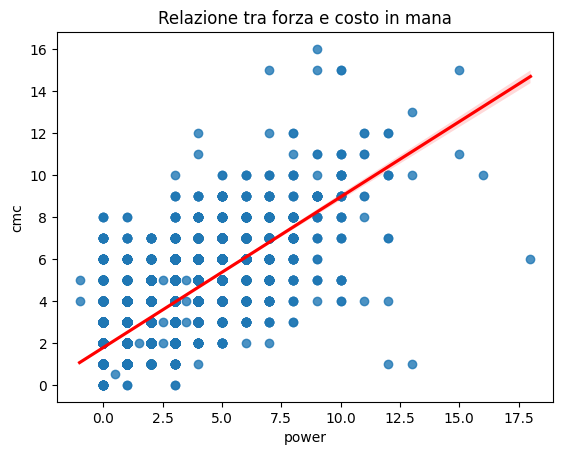

In [91]:
sns.regplot(data=pt_df, x=pt_df['power'], y=pt_df['cmc'], line_kws={"color": "red"})
plt.title("Relazione tra forza e costo in mana")
plt.show()

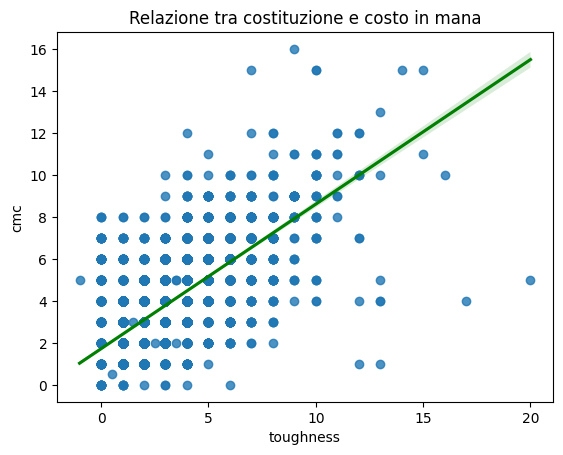

In [92]:
sns.regplot(data=pt_df, x=pt_df['toughness'], y=pt_df['cmc'], line_kws={"color": "green"})
plt.title("Relazione tra costituzione e costo in mana")
plt.show()

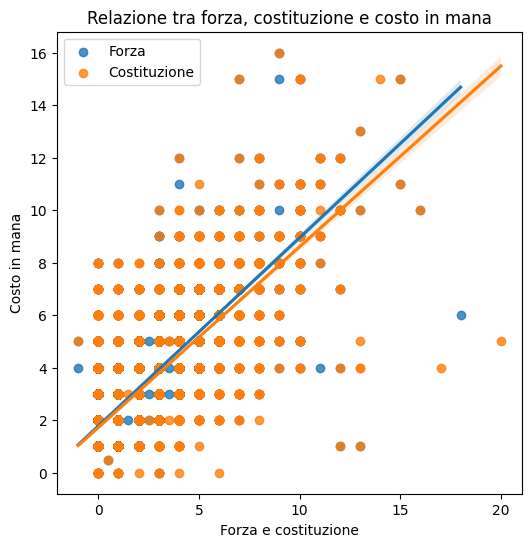

In [93]:
fig, ax = plt.subplots(figsize=(6,6))

sns.regplot(data=pt_df, x=pt_df['power'], y=pt_df['cmc'], ax=ax, label="Forza")
sns.regplot(data=pt_df, x=pt_df['toughness'], y=pt_df['cmc'], ax=ax, label="Costituzione")

ax.set(ylabel='Costo in mana', xlabel='Forza e costituzione')
ax.legend()
plt.title("Relazione tra forza, costituzione e costo in mana")
plt.show()